In [1]:
import numpy as np

In [3]:
a = np.array(list(range(18))).reshape(6, 3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17]])

In [4]:
a[0]

array([0, 1, 2])

In [7]:
a.ndim

2

In [17]:
import torch
dtype = None
a = torch.randn(8, 8)
b = ((a > 0) & (a < 1)).to(dtype if dtype is not None else torch.float)
b.fill_diagonal_(1)

tensor([[1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 1., 0., 0., 1., 1., 0.],
        [0., 0., 1., 1., 0., 1., 0., 0.],
        [0., 1., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1., 0., 0.],
        [0., 1., 1., 0., 1., 1., 1., 1.],
        [1., 0., 0., 1., 1., 1., 1., 1.]])

In [18]:
b

tensor([[1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 1., 0., 0., 1., 1., 0.],
        [0., 0., 1., 1., 0., 1., 0., 0.],
        [0., 1., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1., 0., 0.],
        [0., 1., 1., 0., 1., 1., 1., 1.],
        [1., 0., 0., 1., 1., 1., 1., 1.]])

In [19]:
neighbors = b.sum(dim=-1, keepdims=True)
neighbors

tensor([[2.],
        [4.],
        [3.],
        [2.],
        [2.],
        [2.],
        [6.],
        [6.]])

In [20]:
x = torch.randn(2, 8, 3)

In [21]:
x

tensor([[[ 0.5056,  1.0678, -0.8186],
         [ 0.5638,  0.2760, -0.3686],
         [-0.1275,  0.2798, -0.3855],
         [-1.1664, -1.6995, -0.3338],
         [-0.5337,  0.3205, -2.1212],
         [-0.1679, -0.0521,  0.9437],
         [ 0.7257,  2.3780, -1.5310],
         [-0.5702, -1.5936,  0.6012]],

        [[ 0.7521,  0.6764,  0.2852],
         [-0.2518,  0.1659, -0.6644],
         [ 0.6893, -2.3539, -0.3178],
         [-0.1345, -1.8638, -0.5317],
         [ 0.8888,  0.4751,  1.0188],
         [-1.1893, -0.1742,  0.5721],
         [ 1.2656,  1.1309,  0.5478],
         [ 0.6518,  0.6983,  1.3620]]])

In [22]:
node_feats = torch.einsum('ij, bjf -> bif', b, x)
node_feats

tensor([[[-0.0281,  1.3883, -2.9397],
         [ 0.9939,  2.8818, -1.3414],
         [-1.4618, -1.4717,  0.2244],
         [-0.6026, -1.4235, -0.7024],
         [-0.6613,  0.6003, -2.5067],
         [-1.3343, -1.7516,  0.6099],
         [-0.1100,  1.6087, -2.8613],
         [-1.2069,  0.4211, -3.2596]],

        [[ 1.6409,  1.1515,  1.3040],
         [ 0.5139, -1.2313,  0.1378],
         [-0.6344, -4.3920, -0.2775],
         [-0.3863, -1.6980, -1.1961],
         [ 1.5781, -1.8788,  0.7010],
         [-1.3237, -2.0380,  0.0404],
         [ 2.0545, -0.0580,  2.5185],
         [ 2.2346,  0.9426,  3.2542]]])

In [23]:
node_feats / neighbors

tensor([[[-0.0141,  0.6941, -1.4699],
         [ 0.2485,  0.7205, -0.3353],
         [-0.4873, -0.4906,  0.0748],
         [-0.3013, -0.7117, -0.3512],
         [-0.3306,  0.3002, -1.2533],
         [-0.6671, -0.8758,  0.3050],
         [-0.0183,  0.2681, -0.4769],
         [-0.2011,  0.0702, -0.5433]],

        [[ 0.8204,  0.5757,  0.6520],
         [ 0.1285, -0.3078,  0.0344],
         [-0.2115, -1.4640, -0.0925],
         [-0.1931, -0.8490, -0.5980],
         [ 0.7890, -0.9394,  0.3505],
         [-0.6619, -1.0190,  0.0202],
         [ 0.3424, -0.0097,  0.4198],
         [ 0.3724,  0.1571,  0.5424]]])

In [24]:
import torch

x = torch.tensor(list(range(2*3*4))).reshape(2, 3, 4)
x

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [28]:
a = x.repeat(1, 1, 3).reshape(-1, 3*3, 4)

In [29]:
b = x.repeat(1, 3, 1)

In [30]:
a, b

(tensor([[[ 0,  1,  2,  3],
          [ 0,  1,  2,  3],
          [ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 4,  5,  6,  7],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11],
          [ 8,  9, 10, 11],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [12, 13, 14, 15],
          [12, 13, 14, 15],
          [16, 17, 18, 19],
          [16, 17, 18, 19],
          [16, 17, 18, 19],
          [20, 21, 22, 23],
          [20, 21, 22, 23],
          [20, 21, 22, 23]]]),
 tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11],
          [ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11],
          [ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23],
          [12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23],
          [12, 13, 14, 15],
          [16, 17, 18, 19],
          [

In [32]:
torch.cat([a, b], dim=-1).reshape(2, 3, -1, 2 * 4)

tensor([[[[ 0,  1,  2,  3,  0,  1,  2,  3],
          [ 0,  1,  2,  3,  4,  5,  6,  7],
          [ 0,  1,  2,  3,  8,  9, 10, 11]],

         [[ 4,  5,  6,  7,  0,  1,  2,  3],
          [ 4,  5,  6,  7,  4,  5,  6,  7],
          [ 4,  5,  6,  7,  8,  9, 10, 11]],

         [[ 8,  9, 10, 11,  0,  1,  2,  3],
          [ 8,  9, 10, 11,  4,  5,  6,  7],
          [ 8,  9, 10, 11,  8,  9, 10, 11]]],


        [[[12, 13, 14, 15, 12, 13, 14, 15],
          [12, 13, 14, 15, 16, 17, 18, 19],
          [12, 13, 14, 15, 20, 21, 22, 23]],

         [[16, 17, 18, 19, 12, 13, 14, 15],
          [16, 17, 18, 19, 16, 17, 18, 19],
          [16, 17, 18, 19, 20, 21, 22, 23]],

         [[20, 21, 22, 23, 12, 13, 14, 15],
          [20, 21, 22, 23, 16, 17, 18, 19],
          [20, 21, 22, 23, 20, 21, 22, 23]]]])

In [38]:
w = torch.randn(2 * 4, 1)
result = torch.einsum('...ij,jk->...ik', torch.cat([a, b], dim=-1).reshape(2, 3, -1, 2 * 4).to(torch.float), w).squeeze_()

In [37]:
test = torch.randn(3, 3)
test = (test > 0).to(torch.float)
test

tensor([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 1.]])

In [39]:
torch.where(test > 0, result, -1e15)

tensor([[[-1.0000e+15,  3.9230e+00, -1.0000e+15],
         [-1.0000e+15,  1.3221e+01, -1.0000e+15],
         [-1.0000e+15,  2.2519e+01,  2.3147e+01]],

        [[-1.0000e+15,  3.3702e+01, -1.0000e+15],
         [-1.0000e+15,  4.3000e+01, -1.0000e+15],
         [-1.0000e+15,  5.2297e+01,  5.2926e+01]]])

In [44]:
import torch.nn.functional as F
F.softmax(torch.where(test > 0, result, -1e15), dim=-1)

tensor([[[0.0000, 1.0000, 0.0000],
         [0.0000, 1.0000, 0.0000],
         [0.0000, 0.3479, 0.6521]],

        [[0.0000, 1.0000, 0.0000],
         [0.0000, 1.0000, 0.0000],
         [0.0000, 0.3479, 0.6521]]])

In [2]:
import torch
a = torch.tensor(list(range(2*3*4))).reshape(2, 3, 4)
a

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [10]:
a[:, 0, (2, 0)].reshape(-1, 2, 2)

tensor([[[ 2,  0],
         [14, 12]]])

In [11]:
import os
os.getcwd()

'/home/kunlinsong/Project/Association'

In [21]:
csv_path = os.path.join(os.getcwd(), 'Data', 'Anyang', 'Anyang.csv')
import pandas as pd
attr = ['O3', 'PM10']
df = pd.read_csv(csv_path)
df[df[attr].isnull().any(axis=1)==True]['time'].to_list()

['2016-04-15 01:00:00',
 '2016-04-15 08:00:00',
 '2016-04-15 13:00:00',
 '2016-04-15 22:00:00',
 '2016-04-15 23:00:00',
 '2016-05-14 21:00:00',
 '2016-05-15 05:00:00',
 '2016-05-15 08:00:00',
 '2016-05-16 03:00:00',
 '2016-05-16 09:00:00',
 '2016-05-17 04:00:00',
 '2016-06-28 09:00:00',
 '2016-07-18 23:00:00',
 '2016-08-25 04:00:00',
 '2016-09-18 14:00:00',
 '2016-09-20 10:00:00',
 '2016-09-20 11:00:00',
 '2016-10-04 15:00:00',
 '2016-10-15 05:00:00',
 '2016-11-09 16:00:00',
 '2016-12-25 23:00:00',
 '2016-12-26 03:00:00',
 '2017-01-28 08:00:00',
 '2017-02-12 07:00:00',
 '2017-03-22 09:00:00',
 '2017-03-22 10:00:00',
 '2017-03-30 07:00:00',
 '2017-04-04 00:00:00',
 '2017-04-04 02:00:00',
 '2017-04-04 03:00:00',
 '2017-04-04 08:00:00',
 '2017-04-04 09:00:00',
 '2017-04-04 11:00:00',
 '2017-04-04 13:00:00',
 '2017-04-05 05:00:00',
 '2017-04-05 06:00:00',
 '2017-05-14 23:00:00',
 '2017-06-21 14:00:00',
 '2017-07-18 02:00:00',
 '2017-07-21 11:00:00',
 '2017-07-29 13:00:00',
 '2017-07-29 14:

In [3]:
import torch
a = torch.tensor(list(range(3*4*5))).reshape(3, 4, 5).to(torch.float32)
dense = torch.nn.Linear(5, 6, dtype=torch.float32)
dense(a).shape

torch.Size([3, 4, 6])

In [5]:
import pytz
import datetime

time = datetime.datetime(1970, 1, 1, 0, 0, 0, tzinfo=pytz.utc)

In [6]:
time

datetime.datetime(1970, 1, 1, 0, 0, tzinfo=<UTC>)

In [12]:
chinese_tz = pytz.timezone('Asia/Shanghai')
chinese_time = time.astimezone(chinese_tz)
chinese_time, time


(datetime.datetime(1970, 1, 1, 8, 0, tzinfo=<DstTzInfo 'Asia/Shanghai' CST+8:00:00 STD>),
 datetime.datetime(1970, 1, 1, 0, 0, tzinfo=<UTC>))

In [13]:
import datetime
a = datetime.timedelta(days=1)
a * 2

datetime.timedelta(days=2)

In [24]:
import numpy as np
a = np.array(list(range(3*5))).reshape(5, 3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [25]:
co1 = a.repeat(len(a), axis=0)

In [26]:
co2 = np.tile(a, (len(a), 1))

In [27]:
from geopy import distance
for x, y in zip(co1, co2):
    distance.distance(list[x], list(y)).km

RecursionError: maximum recursion depth exceeded while calling a Python object

In [28]:
np.meshgrid(a[:, 0], a[:, 1])

[array([[ 0,  3,  6,  9, 12],
        [ 0,  3,  6,  9, 12],
        [ 0,  3,  6,  9, 12],
        [ 0,  3,  6,  9, 12],
        [ 0,  3,  6,  9, 12]]),
 array([[ 1,  1,  1,  1,  1],
        [ 4,  4,  4,  4,  4],
        [ 7,  7,  7,  7,  7],
        [10, 10, 10, 10, 10],
        [13, 13, 13, 13, 13]])]

In [31]:
import numpy as np

# Create a 3x3 array
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Generate all possible permutations of the rows in the array
permutations = np.array([arr[idx] for idx in np.ndindex(*arr.shape)]).reshape(-1, arr.shape[1], arr.shape[2])

# Print the resulting array of shape (6, 3, 3)
print(permutations)

IndexError: tuple index out of range

In [38]:
import pandas as pd

df = pd.DataFrame({'time': ['2022-01-01 12:00:00', '2022-01-02 12:00:00', '2022-01-03 12:00:00', '2022-01-04 12:00:00'],
                   'value': [1, 2, 3, 4]})
df

,time,value
0,2022-01-01 12:00:00,1
1,2022-01-02 12:00:00,2
2,2022-01-03 12:00:00,3
3,2022-01-04 12:00:00,4


In [41]:
df = df.drop(columns=['time']).values
df

array([[1],
       [2],
       [3],
       [4]])

In [37]:
df.shape

(4, 1)

In [42]:
a = [1, 2, 3]
b = [3, 5, 2, 1]

idx = [b.index(x) for x in a]

print(idx)

[3, 2, 0]


In [43]:
import numpy as np

a = np.array(list(range(3*5))).reshape(3, 5)
b = a.copy()
a, b

(array([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]]),
 array([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]]))

In [44]:
np.concatenate([a, b], axis=1)

array([[ 0,  1,  2,  3,  4,  0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 10, 11, 12, 13, 14]])

In [45]:
np.array([a, b])

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]],

       [[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]]])

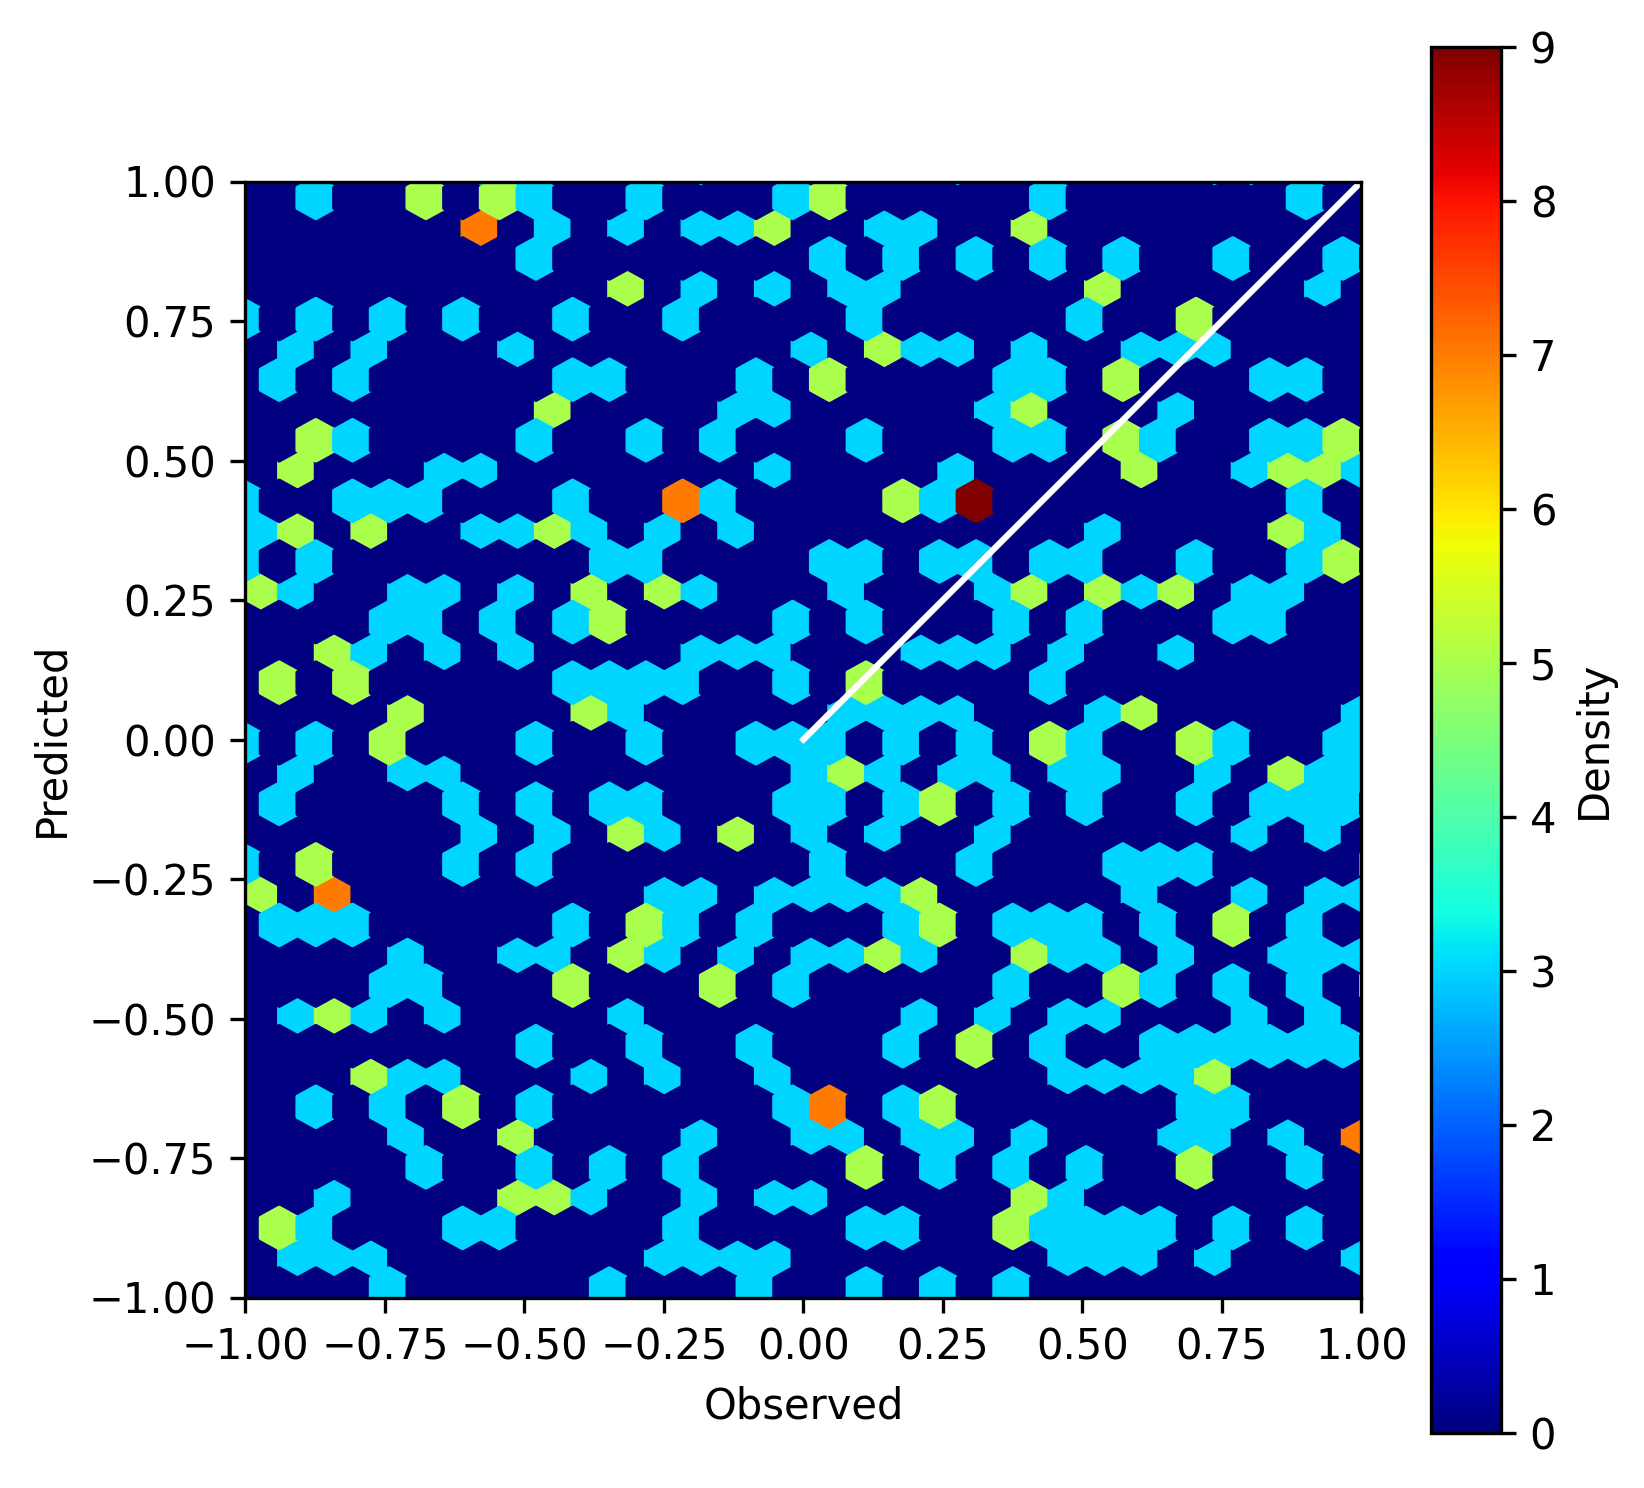

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 创建1000个点
points = np.random.randn(1000, 2)

# 绘制点的分布密度图
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)
ax.hexbin(points[:, 0], points[:, 1], bins=10, cmap="jet")

# 添加图例
cbar = fig.colorbar(ax.get_children()[0], ax=ax)
cbar.set_label("Density")

# 绘制y=x线
ax.plot([0, 1], [0, 1], color="white", label="Perfect fit")

# 给y=x线添加标签
ax.set_xlabel("Observed")
ax.set_ylabel("Predicted")

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')

# 显示图形
plt.show()

In [2]:
chr(0x03BC)

'μ'

In [3]:
for i in range(0):
    print(i)
    if i == 5:
        break
else:
    print("The loop is finished")

The loop is finished


In [7]:
import torch

# Create a tensor
x = torch.tensor(list(range(24))).reshape(2, 3, 4).to(torch.float32)

# Apply the softmax function
y = torch.nn.functional.softmax(x, dim=-1)

# Print the output
print(y)

tensor([[[0.0321, 0.0871, 0.2369, 0.6439],
         [0.0321, 0.0871, 0.2369, 0.6439],
         [0.0321, 0.0871, 0.2369, 0.6439]],

        [[0.0321, 0.0871, 0.2369, 0.6439],
         [0.0321, 0.0871, 0.2369, 0.6439],
         [0.0321, 0.0871, 0.2369, 0.6439]]])


In [8]:
import torch

# Create a list of torch tensors
list_of_tensors = [torch.tensor([1, 2, 3]), torch.tensor([4, 5, 6])]

# Make the list of torch tensors a torch tensor
tensor = torch.stack(list_of_tensors)

# Print the tensor
print(tensor)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [9]:
import torch
from torch.utils.data import DataLoader

# Create a dataset
dataset = torch.utils.data.Dataset()

# Create a dataloader
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Change the shuffle param to False
dataloader.shuffle = False

# Print the shuffle param
print(dataloader.shuffle)

TypeError: object of type 'Dataset' has no len()